# Week 9: Homework 3

----------------------------------------------------
Machine Learning                      

Year 2019/2020

*Vanessa Gómez Verdejo vanessa@tsc.uc3m.es* 

----------------------------------------------------

The aim of this HW is to analyse the performance of SVMs with different cofigurations (different kernels and parameters), as well as different approaches to combine the SMV training with a feature selection stage. As in the previous homework, we will work with the Breast Cancer database.

Let's start loading and preparing the data and, next, complete the given exercises.

In [0]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split

### Exercise 1. Load and prepare the data

As you already know, the  [Breast cancer data set](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html) is a binary classification problem aimed to detect breast cancer from a  digitized image of breast mass characterized with 30 input features describing the mass.

Complete next cell code, so that you can:
* Load the dataset
* Create training and testing partitions with the 60% and 40% of the original data
* Normalize the data to zero mean and unitary standard deviation 

### Solution

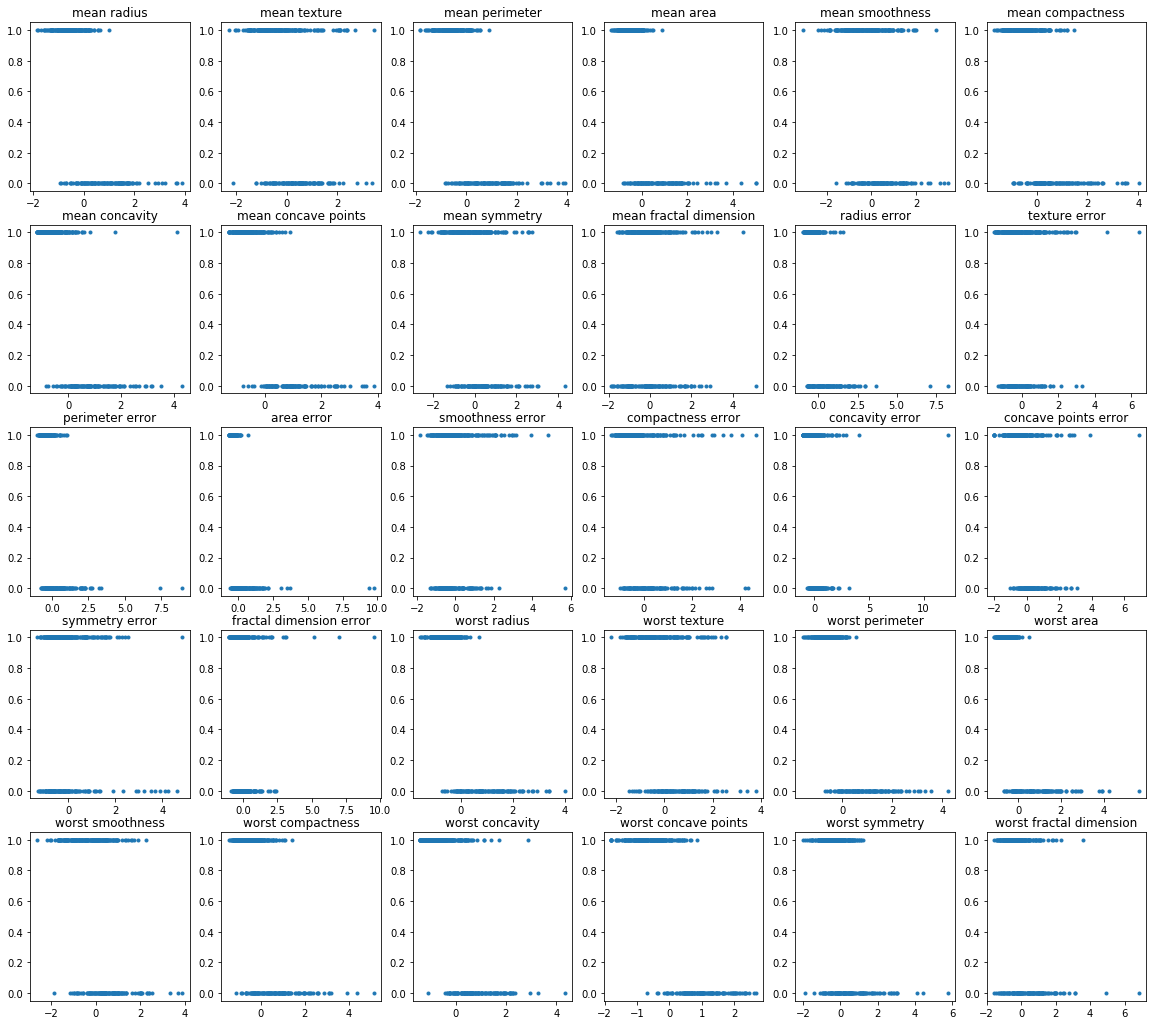

In [0]:
data = load_breast_cancer()

X = data.data
Y = data.target
feature_names = data.feature_names

#Let's apply standard scaling to all the data

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=0)

# Data normalization
transformer = StandardScaler().fit(X_train)
X_train_norm = transformer.transform(X_train)
X_test_norm =  transformer.transform(X_test)

D = X.shape[1]

plt.figure( figsize=(20,18))
for d in range(D):
  plt.subplot(5,6,d+1)
  plt.plot(X_train_norm[:,d],Y_train,'.',)
  plt.title(feature_names[d])

X_train = X_train_norm
X_test = X_test_norm

### Exercise 2. Analysis of SVM performance

The goal of Exercise 2 is to design the best possible SVM. So, please, check different configurations (kernels, parameters, ...) and select the configuration with better generalization capabilities. 

Be careful with the kind of analysis that you carry out. In case you only want to compare different configurations (either different kernels or different multiclass approaches), you can get the final test performance, for each configuration, and compare them. But, in case you want to select the best possible configuration (for example, either I should use a linear kernel or a RBF one), you have to use an accuracy score over a validation partition (or a cross-validation) process. 

### Solution

In [0]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

#--------------------Tunable parameters----------------------------

gammaValues = np.array([0.001, 0.01, 0.1, 1, 10, 100])/D
cValues = np.array([0.5, 0.75, 0.85, 0.95, 1, 1.15, 1.25])
coef0Values = np.array([20, -15, -10, 5, 0, 5, 10, 15, 20])
degreeValues = np.array([1, 2, 3, 4, 5])

#------------------------------------------------------------------

parameters = {'kernel':( 'linear', 'poly', 'rbf'), 
              'C':cValues, 
              'gamma':gammaValues,
              'coef0':coef0Values,
              'degree': degreeValues}


svc = SVC(gamma="scale")

my_SVM = GridSearchCV(svc, parameters, cv=10, iid=True)
my_SVM.fit(X_train, Y_train)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid=True, n_jobs=None,
             param_grid={'C': array([0.5 , 0.75, 0.85, 0.95, 1.  , 1.15, 1.25]),
                         'coef0': array([ 20, -15, -10,   5,   0,   5,  10,  15,  20]),
                         'degree': array([1, 2, 3, 4, 5]),
                         'gamma': array([3.33333333e-05, 3.33333333e-04, 3.33333333e-03, 3.33333333e-02,
       3.33333333e-01, 3.33333333e+00]),
                         'kernel': ('linear', 'poly', 'rbf')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [0]:
def sort_method(elem):
  return elem[0]

In [0]:

means = my_SVM.cv_results_['mean_test_score']
stds = my_SVM.cv_results_['std_test_score']
best_score = max(means)

print('Best parameters for a SVM:', my_SVM.best_params_)
print('Best score: ', best_score)

zipped = sorted(zip(means, stds, my_SVM.cv_results_['params']), key = sort_method)
zipped.reverse()

for mean, std, params in list(zipped)[:200]:
    print("%f (+/-%0.03f) for %r" % (mean, std * 2, params))

Best parameters for a SVM: {'C': 0.5, 'coef0': -15, 'degree': 3, 'gamma': 0.0003333333333333333, 'kernel': 'poly'}
Best score:  0.9765395894428153
0.976540 (+/-0.057) for {'C': 1.25, 'coef0': 20, 'degree': 5, 'gamma': 0.03333333333333333, 'kernel': 'rbf'}
0.976540 (+/-0.057) for {'C': 1.25, 'coef0': 20, 'degree': 4, 'gamma': 0.03333333333333333, 'kernel': 'rbf'}
0.976540 (+/-0.057) for {'C': 1.25, 'coef0': 20, 'degree': 3, 'gamma': 0.03333333333333333, 'kernel': 'rbf'}
0.976540 (+/-0.057) for {'C': 1.25, 'coef0': 20, 'degree': 2, 'gamma': 0.03333333333333333, 'kernel': 'rbf'}
0.976540 (+/-0.057) for {'C': 1.25, 'coef0': 20, 'degree': 1, 'gamma': 0.03333333333333333, 'kernel': 'rbf'}
0.976540 (+/-0.057) for {'C': 1.25, 'coef0': 15, 'degree': 5, 'gamma': 0.03333333333333333, 'kernel': 'rbf'}
0.976540 (+/-0.057) for {'C': 1.25, 'coef0': 15, 'degree': 4, 'gamma': 0.03333333333333333, 'kernel': 'rbf'}
0.976540 (+/-0.057) for {'C': 1.25, 'coef0': 15, 'degree': 3, 'gamma': 0.03333333333333333

In [0]:
#From this results we can deduce that the performance of the model for the various cases is the same. 
#Also, as we can see, we obtain for rbf kernel the same performance for the same cases varying only the degree, which doesn't have any importance for this type of kernel.
#In the last cell, we show the best 10 SVM but if we want to, we can see the best 200 in order to compare with other cases.

### Exercise 3. Feature selection with SVM
Now, let's analyze two approaches for feature selection with SVMs:

#### 1. L1-regularized SVM

In this first case, you have to train a linear SVM regularized with a L1 or LASSO penalty. As you know, this constrain is able to provide sparsity over the weight vector; so, those input features associated to the zeros of the weight vector are not used during the classification process and we obtain an automatic feature selection. 

Note that, if we change the SVM formulation replacing the L2 regularization by a L1, the feature selection is obtained during the SVM training, so both stages (feature selection and classifier training) are completely linked and, therefore, the selection process is guided by the classifier. For this reason this kind of feature selection method is classified as an **embedded feature selector**. 

The only limitation of this approach, as other L1 based feature selection, relies in having to be applied over linear versions of the method, since the sparsity is forced over the vector weights ${\bf w}$. 

#### 2. Recursive Feature Elimination (RFE)

The Recursive Feature Elimination (RFE) method iteratively trains a set of SVM classifiers and, in each step, it eliminates a feature (or a subset of features) in such a way that the classification margin is reduced the least. 

This method is known as a **wrapper approach**, since it iteratively trains a SVM and evaluates its margin to decide which feature can be eliminated.

However, unlike L1-SVM,  this method can be applied over the kernelized version of the SVM, providing a feature selection strategy for both linear and non-linear SVMs.

**References**

[1] Guyon, I., Weston, J., Barnhill, S., & Vapnik, V., “Gene selection for cancer classification using support vector machines”, Mach. Learn., 46(1-3), 389–422, 2002.



### Exercise 3.1 L1-SVM

Analyze the properties of the L1-SVM as feature selection approach. For this purpose, use the linear SVM implementation given by the method [LinearSVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html), which directly let's select the regularization type (L1 or L2) to be used.

Unlike other feature selection methods, here we cannot obtain a ranking of variables. In this case, we have to sweep the value of the regularization parameter in order to get a higher (or lower) sparsity of the weight vector. According to this, train a linear L1-SVM for different values of the regularization parameter and, for each value of C, analyze the test accuracy, as well as the number of used features. 

Later, try to plot the accuracy vs. the number of features. Note that different values of C can provide the same number of features with different accuracies, so take care of this for this representation. In case you want to obtain the optimum working point, remember to compute a validation error to select the optimum value of C.

Finally, don't forget to analyze the obtained results.



### Solution

In [0]:
#ESTO EN REALIDAD NO ES LO QUE PIDE, PERO LO DEJO POR SI NOS HACE FALTA, SI AL FINAL NO, ELIMINAMOS LA CELDA
#First of all we'll need to find the best parameters for the linear SVM with l1 regularization

from sklearn.svm import LinearSVC

#--------------------Tunable parameters----------------------------

tolValues = np.array([0.0001, 0.001, 0.01, 0.1, 1, 10])
cValues = np.array([0.5, 0.75, 0.85, 0.95, 1, 1.15, 1.25])

#------------------------------------------------------------------

parameters = {'tol':tolValues, 
              'C':cValues}

#The values for parameter dual is due to the recommendation of the library that says that if number_samples > number_features
#better set it to false.

#On the other hand, since we get a convergence warning for the grid search, we realized that since we have normalized the data and
#regularization parameter C is well set, we deduced that the problem relys on the maximum number of iterations

linearSVC = LinearSVC(penalty ='l1', dual=False, max_iter=2000)

my_SVM = GridSearchCV(linearSVC, parameters, cv=10, iid=True)
my_SVM.fit(X_train, Y_train)
print('Best parameters for a SVM:', my_SVM.best_params_)
print('Best score: ', best_score)

Best parameters for a SVM: {'C': 0.85, 'tol': 10.0}
Best score:  0.9765395894428153


In [0]:
means = my_SVM.cv_results_['mean_test_score']
stds = my_SVM.cv_results_['std_test_score']
best_score = max(means)

zipped = sorted(zip(means, stds, my_SVM.cv_results_['params']), key = sort_method)
zipped.reverse()

for mean, std, params in list(zipped)[:10]:
    print("%f (+/-%0.03f) for %r" % (mean, std * 2, params))

0.982405 (+/-0.047) for {'C': 0.85, 'tol': 10.0}
0.976540 (+/-0.051) for {'C': 1.0, 'tol': 0.1}
0.976540 (+/-0.058) for {'C': 0.85, 'tol': 0.1}
0.976540 (+/-0.063) for {'C': 0.75, 'tol': 1.0}
0.973607 (+/-0.055) for {'C': 1.15, 'tol': 0.1}
0.973607 (+/-0.048) for {'C': 1.0, 'tol': 10.0}
0.973607 (+/-0.061) for {'C': 1.0, 'tol': 1.0}
0.973607 (+/-0.061) for {'C': 1.0, 'tol': 0.001}
0.973607 (+/-0.061) for {'C': 1.0, 'tol': 0.0001}
0.973607 (+/-0.061) for {'C': 0.95, 'tol': 10.0}


In [0]:
#AQUI SÍ QUE HACEMOS LO QUE PIDE

#Hay que coger una lista de cvalues y 


#for cValue in cValues:
  linearSVC = LinearSVC(penalty ='l1', dual=False, max_iter=2000, tol = 0.1, C= 0.85)
  linearSVC.fit(X_train, Y_train)
  print(linearSVC.coef_)




[[-0.00620497 -0.15891738  0.08441077 -0.27484117 -0.15438604  0.17491198
   0.12462247 -0.27042931 -0.12449066  0.00107697 -0.3805283   0.07596074
  -0.37466388 -0.49889735  0.11703671  0.1914289  -0.12051461  0.
   0.01833366  0.22547854 -0.13391684 -0.37881996 -0.2200359  -0.56021711
  -0.17579183  0.15019461 -0.3809845  -0.61141398 -0.20051784 -0.02439334]]


### Exercise 3.2 Recursive Feature Elimination (RFE)

To understand the working principles of the RFE method, let's present its pseudocode:
* Start with all the variables selected. Let's define $S=\left\lbrace 1, \ldots, D\right\rbrace $ the set of indexes with the selected features (we start with all of them).

* For $d = 1, \ldots, D$
  * Train a SVM with using the features in $S$
  * Compute $ \displaystyle \Vert {\bf w} \Vert_2^2$ with the training data and using the features in $S$. That is, if ${\bf x}_S$ is the data ${\bf x}$, but limited to the features in $S$, we have to compute:
$$  \Vert {\bf w}_S \Vert_2^2 = \sum_{i=1}^N  \sum_{j=1}^N \alpha^{(i)} \alpha^{(j)} K({\bf x}^{(i)}_S,{\bf x}^{(j)}_S)$$ 

  * For each variable $d' \in S$, built ${\bf x}_{S-d'}= {\bf x}_S \setminus x_{d'}$ and compute $ \displaystyle \Vert {\bf w} \Vert_2^2$ with the data in ${\bf x}_{S-d'}$
$$  \Vert {\bf w}_{S-d'} \Vert_2^2 = \sum_{l=1}^L  \sum_{l'=1}^L \alpha^{(l)} \alpha^{(l')} K({\bf x}^{(l)}_{S-d'},{\bf x}^{(l')}_{S-d'})$$  
  * Remove the feature $d^*$, where 
  $$d^{*} = \underset{d'}{\operatorname{argmin}} \left\lbrace \Vert {\bf w}_S \Vert_2^2 -\Vert {\bf w}_{S-d'} \Vert_2^2 \right\rbrace $$
  * Define $S = S \setminus d^*$
  * Stop when any criteria is reached (a given number of features or a degradation in the SVM performance)

<br>

Starting from this pseudocode, implement the RFE method for a kernelized SVM. Then,  analyze the curve test accuracy vs. number of selected features when a linear kernel and a RBF kernel are used (you can use the default values of $C$ and $\gamma$ ). Finally, don't forget to analyze the obtained results. 


Note: Scikit-Learn provides a function with a full implementation of the RFE method and extend this implementation for any classifier. In fact, this function, [RFE( )](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html), let user select the classifier to consider, the number of selected features (parameter n\_features\_to\_select) and the number of features removed in each step (parameter step).  As result, in parameter .ranking returns the ranking position of the each feature (i.e., .ranking\_[i] corresponds to the ranking position of the i-th feature). However, this implementation is only thought for linear methods (it is quite similar to the pruning scheme for ridge regression used in the first HW). Here, I want you to work with the original version of this method [1] which is specifically proposed for no-linear SMVs; so, you have to implement the given method. Anyway, in case you have time, you can try to compare the proposed RFE method with that of Scikit-Learn.

### Solution

In [0]:
def get_kernel(data, ker = 'linear', gamma = None):
  if ker == 'RBF':
    if gamma == None:
      raise Exception('You must provide a -gamma value-')
    else:
      rbf_kernel = (((X - Y)[:,np.newaxis]*(X - Y)[:,np.newaxis].T*gamma) for (X, Y) in pairwise(data))
      print('RBF')
      return rbf_kernel
  if ker == 'linear':
    linear_kernel = (X[:,np.newaxis]*Y[:,np.newaxis].T for (X, Y) in pairwise(data))
    print('Linear')
    return linear_kernel

  else:
    raise Exception('Only -linear- and -RBF- are accepted kernels')

In [0]:
def getMinNorm(norm, array_norms):

  minDiff = abs(norm - array_norms[0])
  minNorm = 0

  for i in range(1, len(array_norms)):
    if (abs(norm - array_norms[i]) < minDiff):
      minNorm = i

  return minNorm
    

In [0]:
S = np.arange(0,30)
iterations = np.arange(0,30)
linearSVCwithRFE = SVC(C = 1.25, kernel = 'linear')

accuracies = []

for d in iterations:
  norms = []

  X_d = X_train[:,S]

  linearSVCwithRFE.fit(X_d, Y_train)
  
  alpha = linearSVCwithRFE.dual_coef_
  Svectors = linearSVCwithRFE.support_vectors_
  w_norm = linearSVCwithRFE.coef_ @ linearSVCwithRFE.coef_.T

  accuracies.append(linearSVCwithRFE.score(X_test[:,S],Y_test))
  
  if acc[-1] < 0.92:
  break
  
  for d_ in S:
    S_ = S[np.where(S != d_)]
    Svectors_ = Svectors[np.where(Svectors != d_)]
    X_ = X_train[linearSVCwithRFE.support_, :]
    X_ = X_train[:, S_]
    w_aux = alpha[:,S_] @ X_.T
    norm_ = w_aux @ w_aux.T
    norms.append(norm_)

  min_norm = getMinNorm(w_norm, norms)
  S = np.delete(S, min_norm)

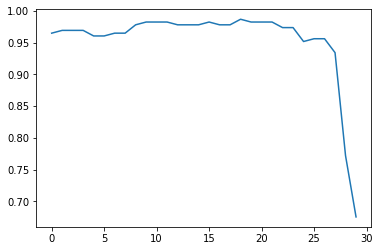

In [0]:
plt.plot(accuracies)
plt.show()